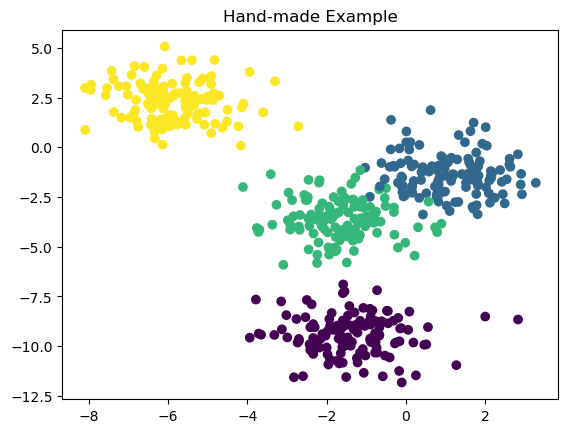

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.make_blobs(centers=4, random_state=2, n_samples=500)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Hand-made Example")
plt.show()

In [2]:
import torch

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# to pytorch tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [4]:
X.shape, y.shape

((500, 2), (500,))

In [5]:
# define nn
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.tanh(self.layer2(x))
        x = torch.softmax(self.output_layer(x), dim=-1)
        return x

In [6]:
# Model parameters
input_size = 2
hidden_size = 128
num_classes = 4
num_epochs = 1024
learning_rate = 0.001

# Initialize the model
model = MLP(input_size, hidden_size, num_classes)

# This criterion computes the cross entropy loss between input logits and target.
loss_fn = torch.nn.CrossEntropyLoss()

# We will use Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [7]:
# use summary writer to track the train and test loss for each epoch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    # Zero gradients for each batch
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update gradients
    optimizer.step()

    # Test the model
    y_pred_test = model(X_test)
    loss_test = loss_fn(y_pred_test, y_test)

    # Log the loss
    writer.add_scalar('Loss/train', loss, epoch)
    writer.add_scalar('Loss/test', loss_test, epoch)

    # Print the loss for each epoch
    print(f"Epoch {epoch}: train loss: {loss.item()}, test loss: {loss_test.item()}")

Epoch 0: train loss: 1.397639513015747, test loss: 1.4016175270080566
Epoch 1: train loss: 1.395836591720581, test loss: 1.397929072380066
Epoch 2: train loss: 1.3923907279968262, test loss: 1.3926223516464233
Epoch 3: train loss: 1.3874315023422241, test loss: 1.3858163356781006
Epoch 4: train loss: 1.3810673952102661, test loss: 1.3776180744171143
Epoch 5: train loss: 1.3733958005905151, test loss: 1.3681325912475586
Epoch 6: train loss: 1.364512324333191, test loss: 1.357469081878662
Epoch 7: train loss: 1.354515552520752, test loss: 1.3457493782043457
Epoch 8: train loss: 1.3435157537460327, test loss: 1.333109736442566
Epoch 9: train loss: 1.3316376209259033, test loss: 1.3197048902511597
Epoch 10: train loss: 1.31902277469635, test loss: 1.3057060241699219
Epoch 11: train loss: 1.305829644203186, test loss: 1.2912994623184204
Epoch 12: train loss: 1.2922319173812866, test loss: 1.2766796350479126
Epoch 13: train loss: 1.2784122228622437, test loss: 1.2620456218719482
Epoch 14: tr

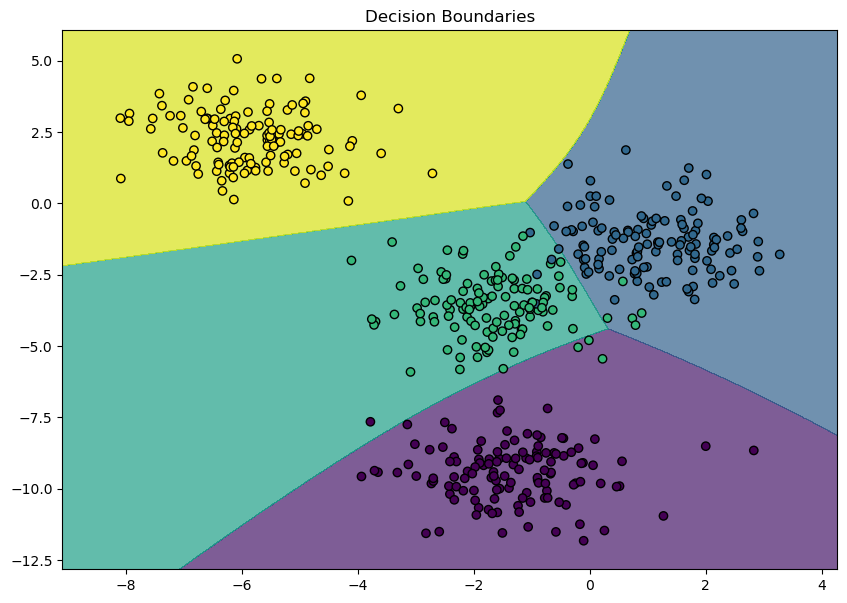

In [8]:
# Plot the decision boundary

# set min and max values and give it some padding
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# convert the grid to a tensor and predict class labels for each point
grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
model.eval()  # set model to evaluation mode
# disable gradient computation
with torch.no_grad():
    Z = model(grid).argmax(dim=1)
# convert the predictions back to numpy array
Z = Z.numpy().reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Boundaries')
plt.show()